In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
missing_value=["?"]
data=pd.read_csv('.\soybean-large.data',names=['Classes','date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt','germination','plant-growth','leaves','leafspots-halo','leafspots-marg','leafspot-size','leaf-shread','leaf-malf','leaf-mild','stem','lodging','stem-cankers','canker-lesion','fruiting-bodies','external decay','mycelium','int-discolor','sclerotia','fruit-pods','fruit spots','seed','mold-growth','seed-discolor','seed-size','shriveling','roots'],na_values=missing_value)
data.head()

In [ ]:
from sklearn.impute import SimpleImputer
impute_Cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent" )
data.iloc[:,1:] =impute_Cat.fit_transform(data.iloc[:,1:])
data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
lebel=encoder.fit_transform(data["Classes"])
lebel

In [ ]:
new_data= data.drop("Classes",axis='columns')
new_data.head()

In [ ]:
new_data["Classes"]= lebel
new_data.head()

In [ ]:
corrmat= new_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20))
top=sns.heatmap(new_data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [8]:
features=new_data.iloc[:,:35]


In [9]:
target=new_data[["Classes"]]


In [10]:
#splitting into tarin test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target.values.ravel(), test_size=0.2, random_state=42)

In [11]:
#MOdeling
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

C:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


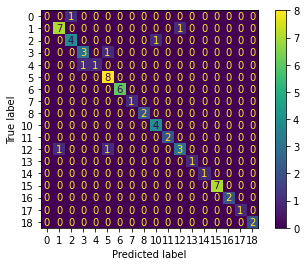

In [13]:
#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
plot_confusion_matrix (model, xtest, ytest)

In [ ]:
ypred = model.predict(xtest)
confusion_matrix(ytest, ypred)

In [17]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(model, features, target.values.ravel(), cv=10)

C:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [18]:
cv
cv.mean()

0.8439784946236559

In [19]:
accuracy_score(ypred, ytest)

0.8870967741935484

In [20]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model, 
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": [3, 5, 7, 9, 1, 13, 15, 17, 19, 21],
        "max_features": ["sqrt", "log2"],
        "min_samples_split": [3,4,5,6,7,8,9,11, 15, 20, 25]
    }, cv = 8, scoring="accuracy", verbose=1
)
grid.fit(features, target)

Fitting 8 folds for each of 880 candidates, totalling 7040 fits


C:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(


GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 1, 13, 15, 17, 19, 21],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 11, 15, 20,
                                               25],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [22]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='sqrt',
                       min_samples_split=3)

In [23]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'splitter': 'best'}

In [24]:
bmodel = grid.best_estimator_
bmodel.fit(features, target.values)
# Visualization

xmin, xmax = features.values[:, 0].min(), target.values[:, 0].max()
ymin, ymax = features.values[:, 1].min(), target.values[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx.ravel(), yy.ravel()]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(features.values[:, 0], features.values[:, 1], c=target, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1